# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [3]:
# Passo 1: Entendimento do Desafio e Passo 2: Entendimento da Área/Empresa -> já feitos no contexto acima
# Queremos entender o quanto os investimentos em TV, Jornal e Rádio influenciam nas vendas, e depois conseguir prevê-los

In [4]:
# Passo 3: Extração/Obtenção de dados
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
# Passo 4: Ajuste de dados (Tratamento/Limpeza) -> nesse projeto, os dados já estão tratados, como podemos ver no comando abaixo
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


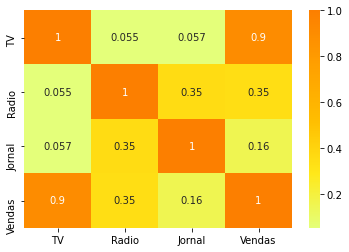

In [8]:
# Passo 5: Análise exploratória -> explorar os dados
# Correlação - valor de -1 ou 0 até 1 que indica o quanto dois aspectos são proporcionais em aumento/diminuição

display(tabela.corr()) # mostrar a correlação de cada elemento da tabela

# Fica mais intuitivo em um gráfico, como o de calor
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot=True, cmap="Wistia") # cmap tem que ser um padrão de cores existente, olhar documentação
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [9]:
# Passo 6: Modelagem + Algoritmos (aqui entra a Inteligência Artificial, se necessário)

from sklearn.model_selection import train_test_split

# Em qualquer modelo de previsão com IA, y é quem você quer prever e x é quem você vai usar para prever y (resto da tabela)
# y -> quem você quer prever
y = tabela["Vendas"]

# x -> quem eu vou usar para prever o y, ou seja, o resto da tabela
x = tabela[["TV", "Radio", "Jornal"]] # lista de colunas restantes
# x = tabela.drop("Vendas", axis=1) -> poderia ser assim

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)
# test_size=0.3 -> 30% dos dados serão designados para teste, os outros 70% para treino
# random_state = 1 garante a mesma execução em qualquer computador. é tipo uma seed. mas a escolha dos daos ainda é aleatória

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [10]:
# Vamos utilizar dois modelos:
# - Regressão linear - plota os dados em um gráfico e tenta traçar a melhor reta para todos os pontos do gráfico
# - Árvore de decisão - faz perguntas (decisões) para a sua base de dados, como "TV > 30?" e gerando nós para "sim" e "não"

In [12]:
# Três passos para a construção da IA:
# importa ela
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria ela
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina ela
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

print("Modelos treinados")

Modelos treinados


#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [13]:
# Passo 7: Interpretação de Resultados

from sklearn.metrics import r2_score

# fazer as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar a previsão com o y_teste (real) (precisão da IA)
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao)) # melhor modelo para esse caso (melhor precisão)

0.9071151423684273
0.966025279589174


#### Visualização Gráfica das Previsões

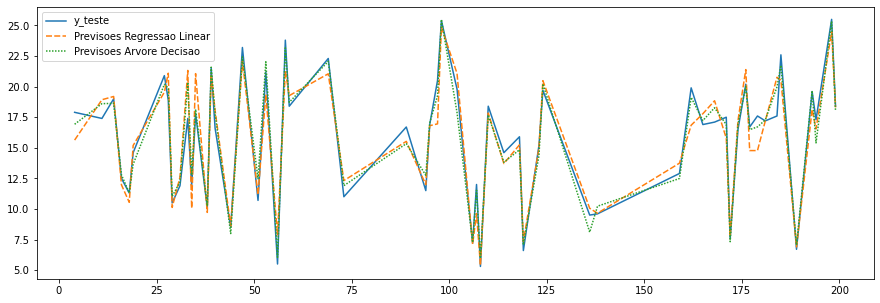

In [16]:
tabela_auxiliar = pd.DataFrame() # tabela vazia
tabela_auxiliar["y_teste"] = y_teste 
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsoes Arvore Decisao"] = previsao_arvoredecisao

plt.figure(figsize=(15, 5))
sns.lineplot(data=tabela_auxiliar) # gráfico de linha
plt.show()

#### Como fazer uma nova previsão?

In [17]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)

nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [18]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.458  8.634 20.077]


In [19]:
# se investirmos 170.2 mil em TV, 45.9 mil em rádio e 0 em Jornal, o modelo de árvore de decisão prevê 20.077 milhões em vendas 

#### Qual a importância de cada variável para as vendas?

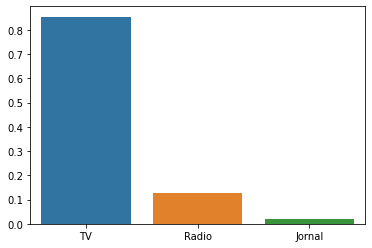

In [20]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
# print(df[["Radio", "Jornal"]].sum())